# Strategy Benchmark

In [1]:
from backtest import *
from data_preparation import *
import pandas as pd

## Strategy Demo

In [2]:
ticker = 'TQQQ'
init_balance = 10000
df, last_update = refresh(ticker, period="20d", interval = "15m")
bnh = buy_n_hold(init_balance, df)

Asset: 11056.16 (Profit:10.56%)


Balance: 10128.20 (Profit:1.28%, # of Trade:43, Win:48.84%, avg: win 0.72% / lose -0.67%)


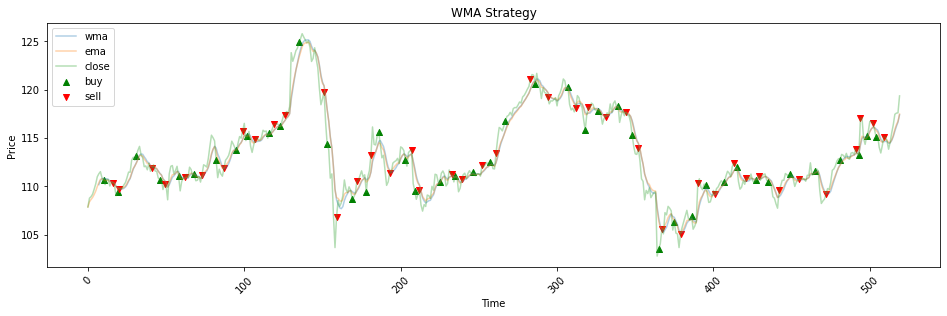

In [3]:
import strategy.strategy_wma as wma

df_wma = wma.prep_data(df, 8, 6)
test(init_balance, df_wma, wma.sell_or_buy)
wma.plot(df, True)

Balance: 10575.79 (Profit:5.76%, # of Trade:29, Win:75.86%, avg: win 1.26% / lose -1.01%)


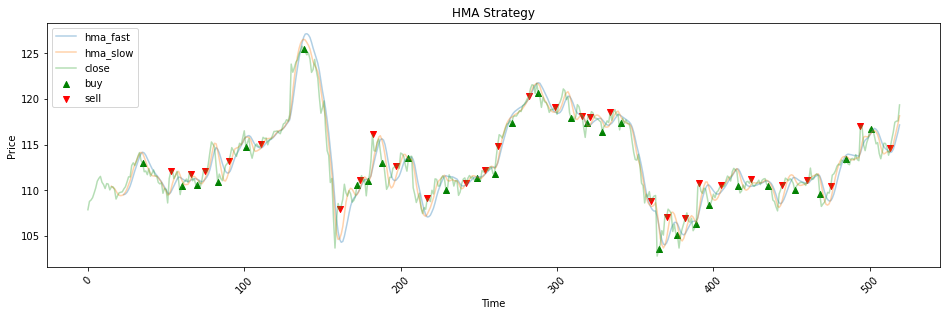

In [4]:
import strategy.strategy_hma as hma

df_hma = hma.prep_data(df, 21, 14)
a = test(init_balance, df_hma, hma.sell_or_buy)
hma.plot(df, True)

Balance: 11203.13 (Profit:12.03%, # of Trade:13, Win:38.46%, avg: win 1.32% / lose -0.52%)


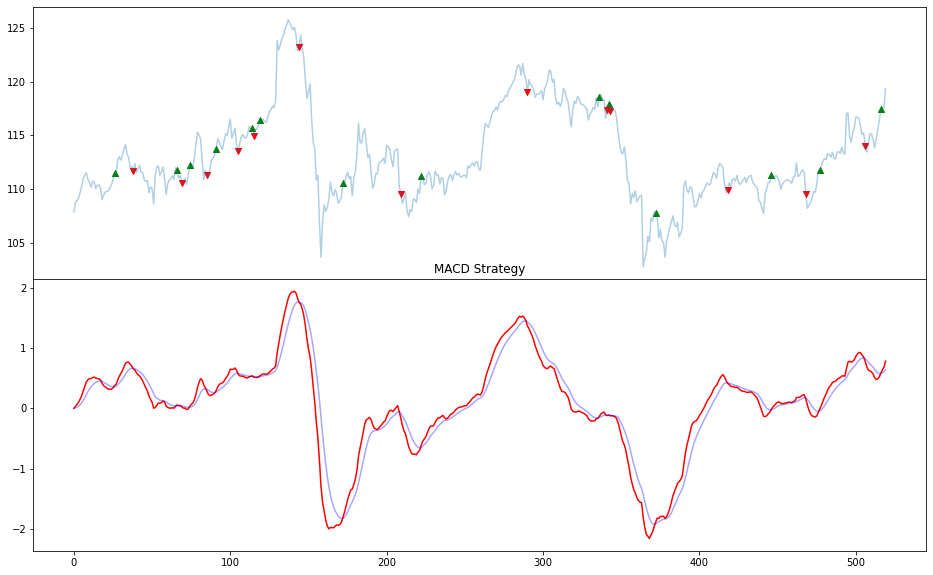

In [5]:
import strategy.strategy_macd as macd

df_macd = macd.prep_data(df, 21, 35)
test(init_balance, df_macd, macd.sell_or_buy, verbose = False)
macd.plot(df, True)

Balance: 20441.35 (Profit:104.41%, # of Trade:32, Win:81.25%, avg: win 2.79% / lose -0.46%)


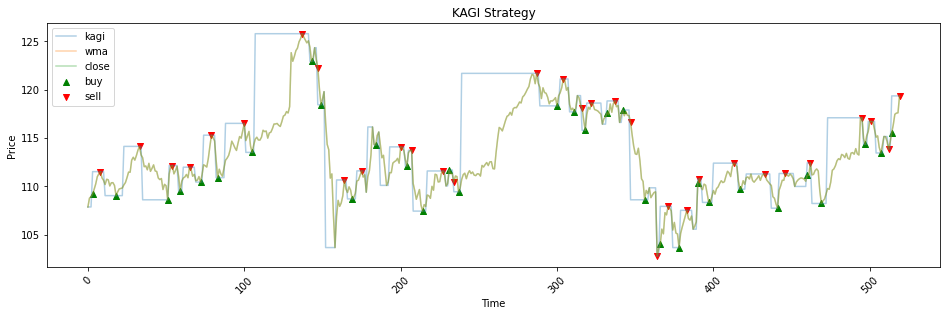

In [6]:
import strategy.strategy_kagi as kagi

df_kagi = kagi.prep_data(df, 0.01, 1)
test(init_balance, df_kagi, kagi.sell_or_buy, verbose=False)
kagi.plot(df, True)

Balance: 11040.31 (Profit:10.40%, # of Trade:14, Win:42.86%, avg: win 1.43% / lose -0.86%)


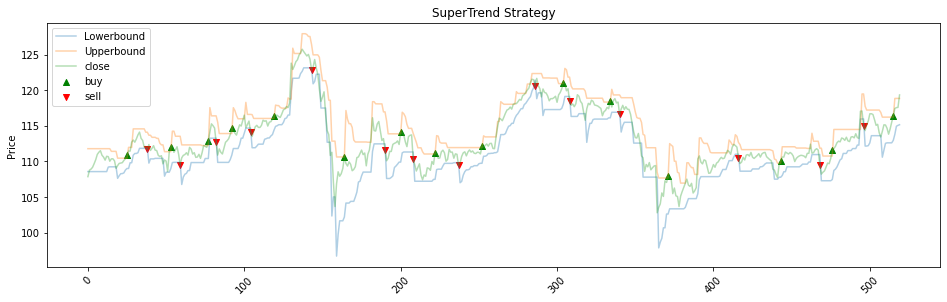

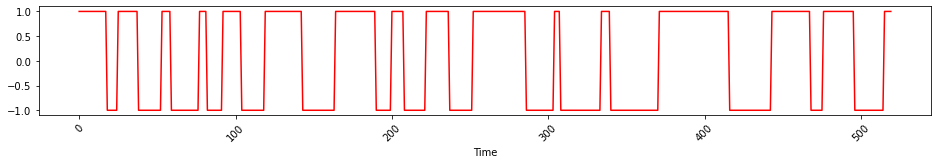

In [7]:
import strategy.strategy_supertrend as supertrend

st_df = supertrend.prep_data(df, 2, 13)
test(init_balance, st_df, supertrend.sell_or_buy)
supertrend.plot(df, True)

Balance: 9602.26 (Profit:-3.98%, # of Trade:29, Win:65.52%, avg: win 0.85% / lose -0.94%)


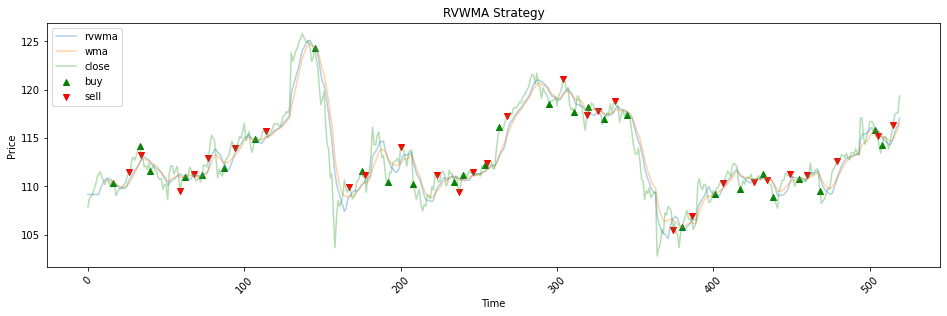

In [8]:
import strategy.strategy_rvwma as rvwma

df_rvwma = rvwma.prep_data(df, 8, 14)
test(init_balance, df_rvwma, rvwma.sell_or_buy)
rvwma.plot(df, True)

## Parameter Tuning

In [9]:
ticker_list = ['QQQ', 'VOO', 'AAPL', 'MSFT', 'COST', 'T']
period = "7d"
interval = "5m"

fib_seq = [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]
fib1_seq = [1, 2, 4, 6, 9, 14, 22, 35, 56, 90, 145, 234, 378]
reversal = [0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.0075, 0.01, 0.02, 0.03]
multipiler = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

Running Test for QQQ
Running Test for VOO
Running Test for AAPL
Running Test for MSFT
Running Test for COST
Running Test for T
Total Running Time: 86.296875 second.


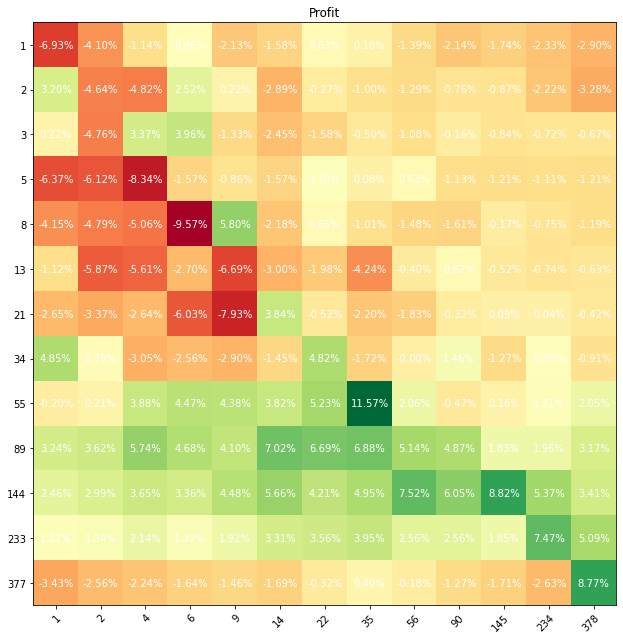

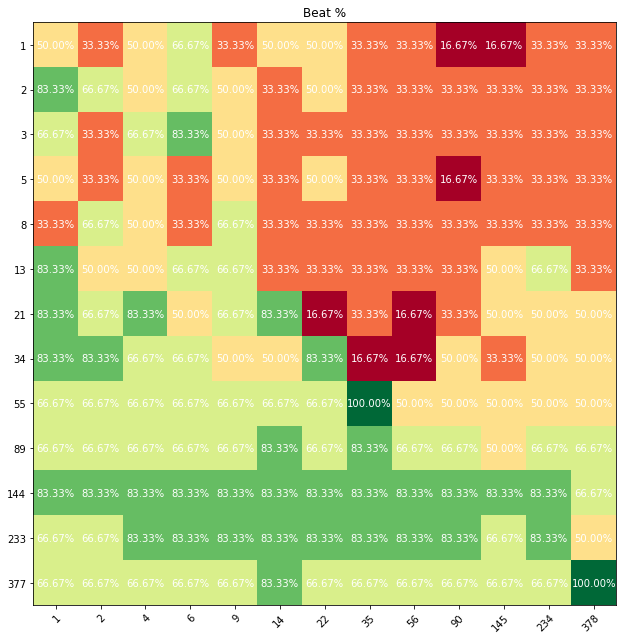

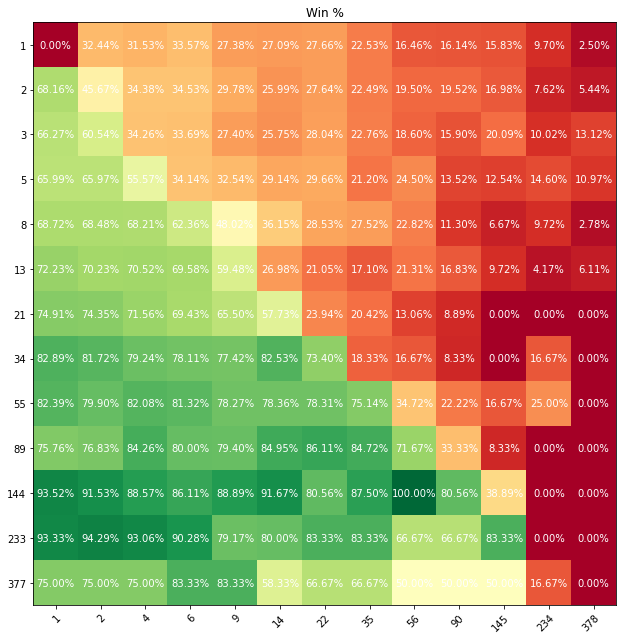

In [10]:
run_strategy(ticker_list, fib_seq, fib1_seq, period, interval, wma)

Running Test for QQQ
Running Test for VOO
Running Test for AAPL
Running Test for MSFT
Running Test for COST
Running Test for T
Total Running Time: 438.390625 second.


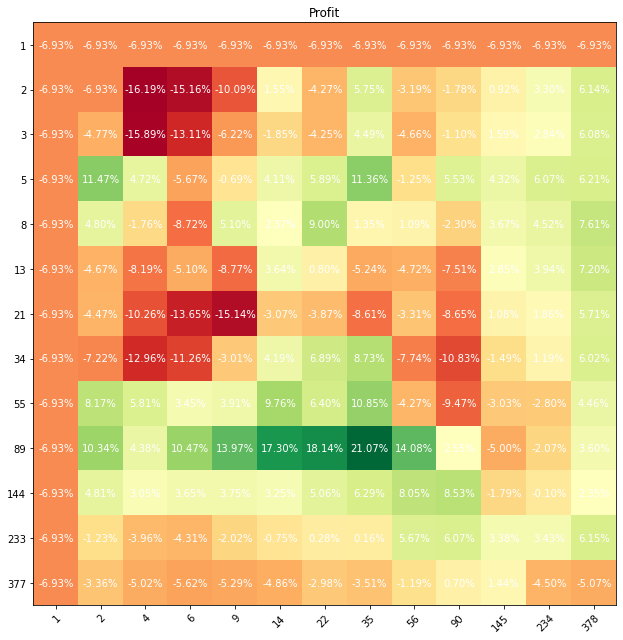

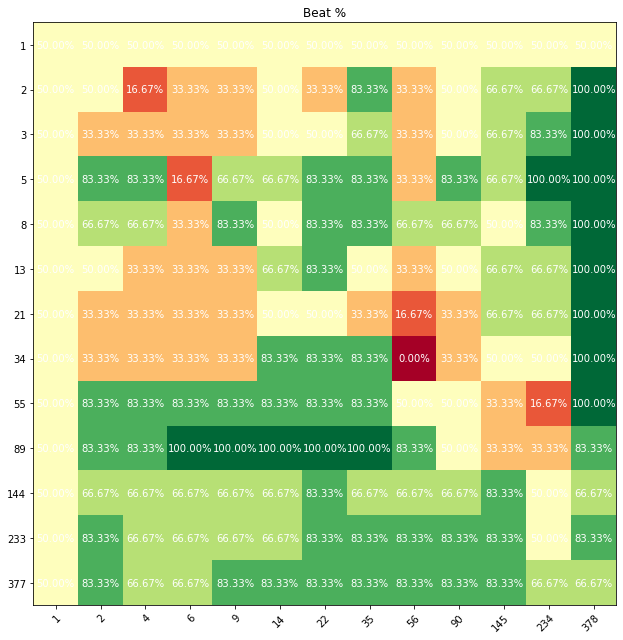

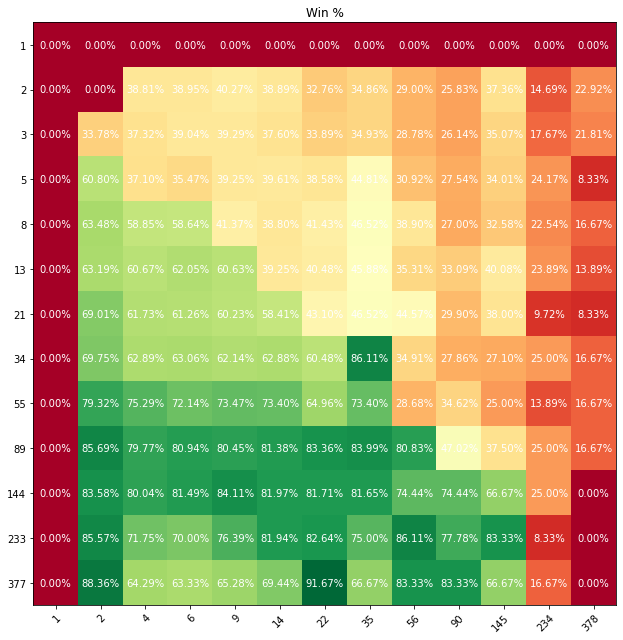

In [11]:
run_strategy(ticker_list, fib_seq, fib1_seq, period, interval, hma)

Running Test for QQQ
Running Test for VOO
Running Test for AAPL
Running Test for MSFT
Running Test for COST
Running Test for T
Total Running Time: 17.40625 second.


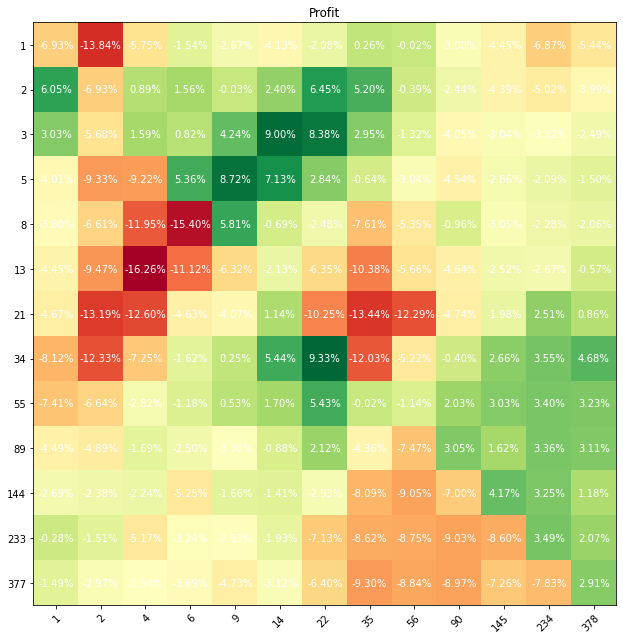

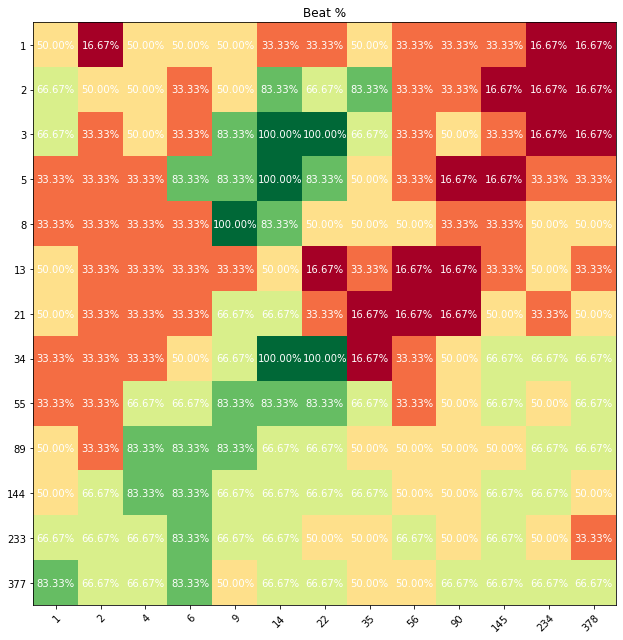

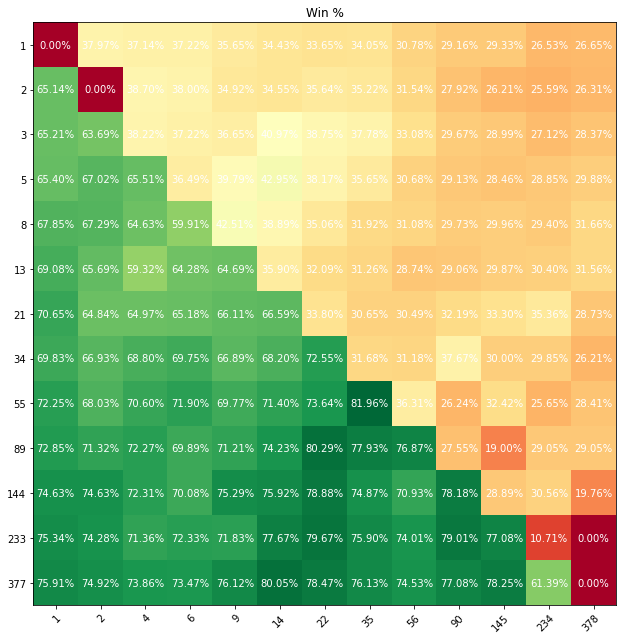

In [12]:
run_strategy(ticker_list, fib_seq, fib1_seq, period, interval, macd)

Running Test for QQQ
Running Test for VOO
Running Test for AAPL
Running Test for MSFT
Running Test for COST
Running Test for T
Total Running Time: 74.59375 second.


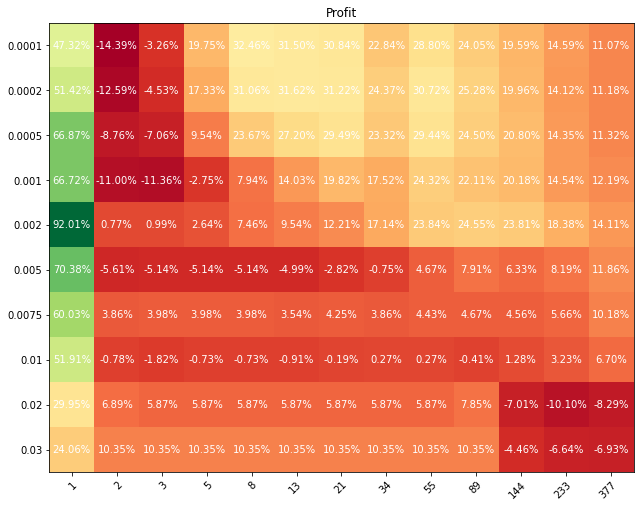

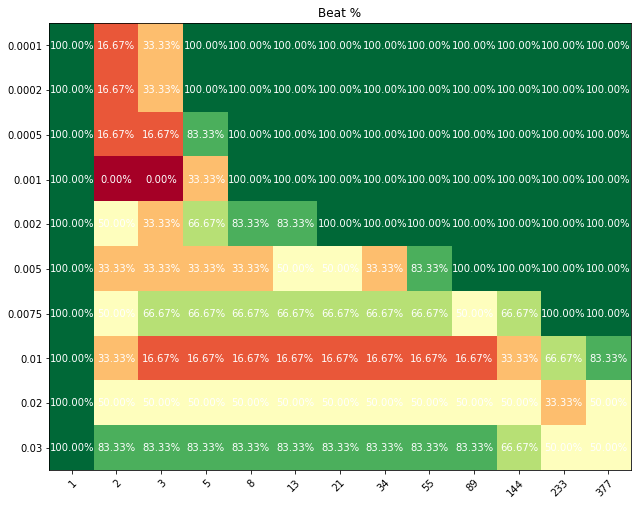

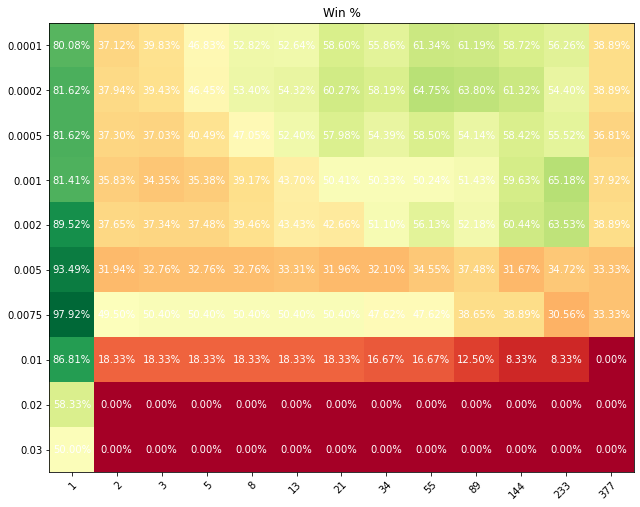

In [13]:
run_strategy(ticker_list, reversal, fib_seq, period, interval, kagi)

Running Test for QQQ
Running Test for VOO
Running Test for AAPL
Running Test for MSFT
Running Test for COST
Running Test for T
Total Running Time: 26.359375 second.


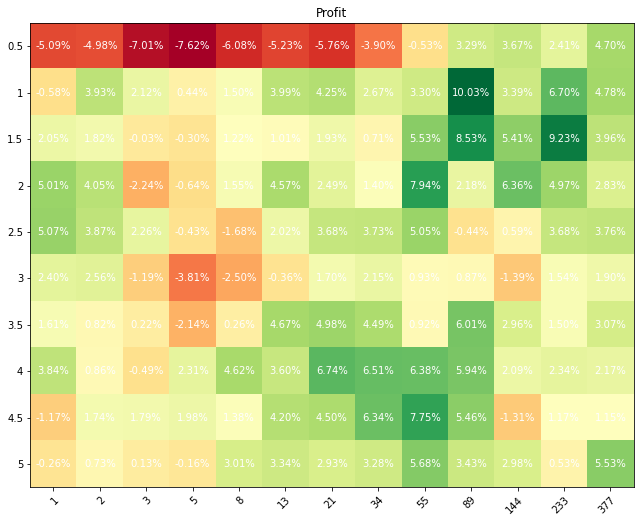

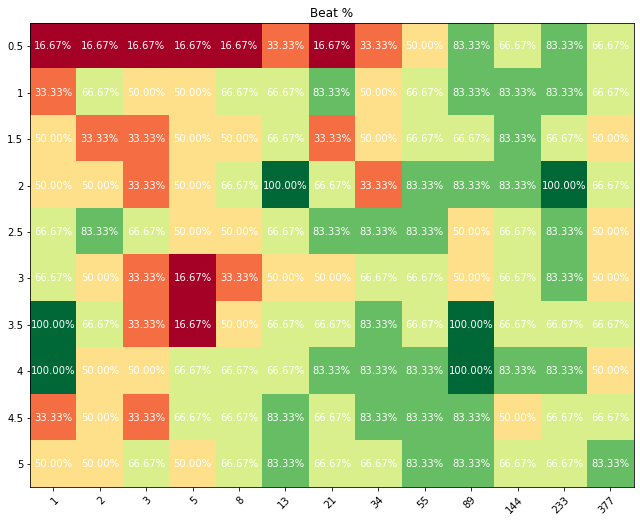

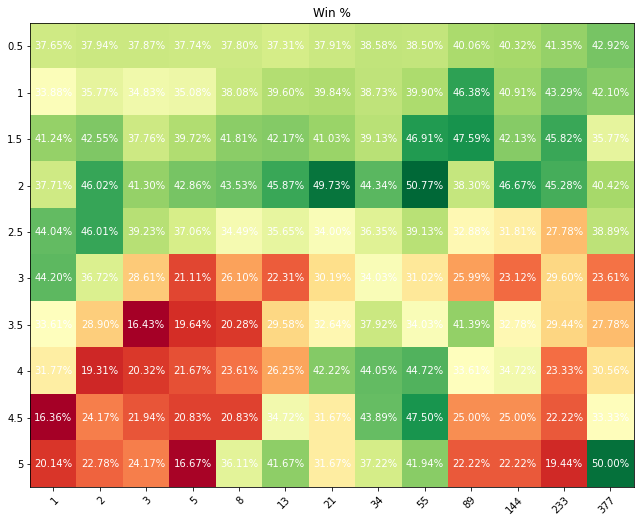

In [14]:
run_strategy(ticker_list, multipiler, fib_seq, period, interval, supertrend)

Running Test for QQQ
Running Test for VOO
Running Test for AAPL
Running Test for MSFT
Running Test for COST
Running Test for T
Total Running Time: 87.625 second.


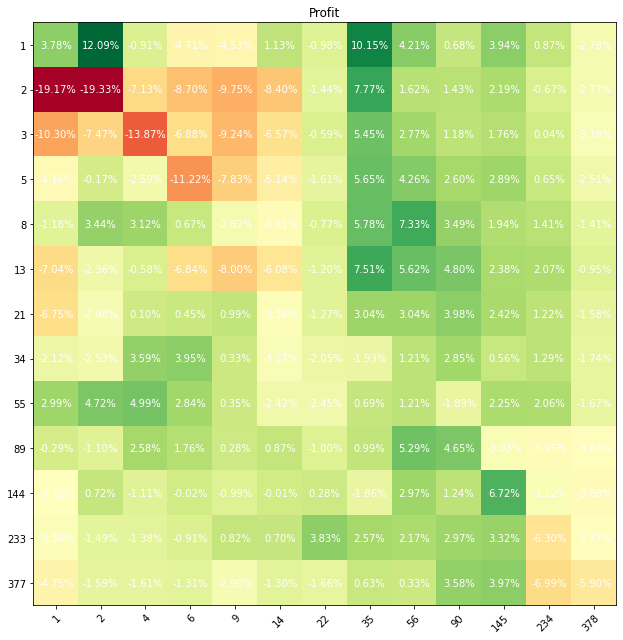

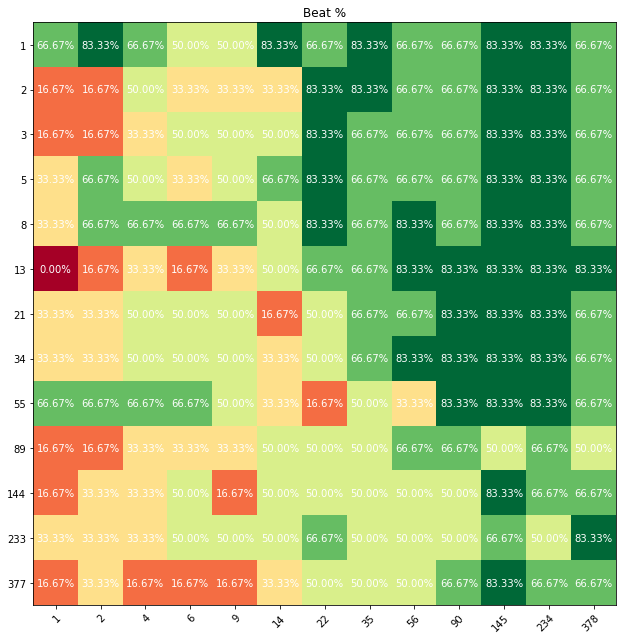

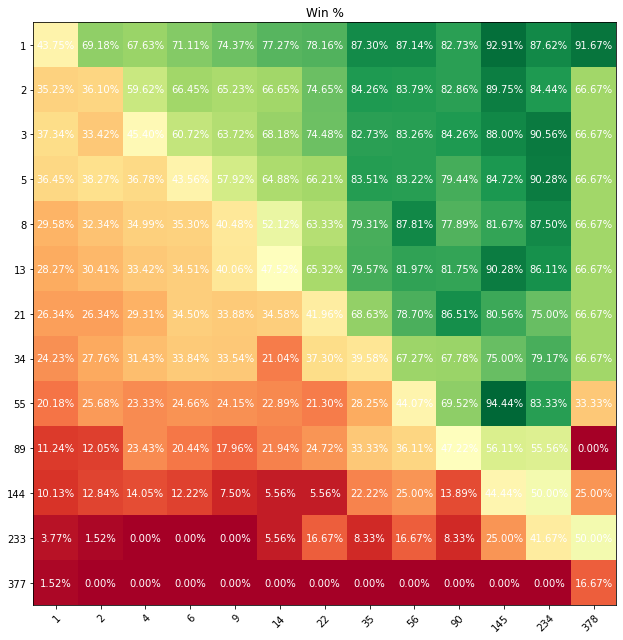

In [15]:
run_strategy(ticker_list, fib_seq, fib1_seq, period, interval, rvwma)

## Verification

In [16]:
tickers = ['TQQQ','AMD', 'W', 'UAL']

for ticker in tickers:
    df, last_update = refresh(ticker, "240d", "1h")
    
    print("Testing '{}'...".format(ticker))
    print("    WMA: \t",end='')
    test(10000, wma.prep_data(df, 5, 13), wma.sell_or_buy) # verified
    print("    HMA: \t",end='')
    test(10000, hma.prep_data(df, 5, 13), hma.sell_or_buy) # verified
    print("    MACD: \t",end='')
    test(10000, macd.prep_data(df, 5, 13), macd.sell_or_buy) # verified
    print("    Kagi: \t",end='')
    test(10000, kagi.prep_data(df, 0.01, 1), kagi.sell_or_buy) # verified
    print("    ST: \t",end='')
    test(10000, supertrend.prep_data(df, 2.5, 13), supertrend.sell_or_buy) # verified
    print("    RVWMA: \t",end='')
    test(10000, rvwma.prep_data(df, 21, 13), rvwma.sell_or_buy) # verified
    print("    Buy&Hold: \t",end='')
    buy_n_hold(10000, df)

Testing 'TQQQ'...
    WMA:Balance: 25450.66 (Profit:154.51%, # of Trade:55, Win:45.45%, avg: win 2.75% / lose -0.97%)
    HMA:Balance: 17874.96 (Profit:78.75%, # of Trade:173, Win:49.71%, avg: win 1.48% / lose -1.07%)
    MACD: 	Balance: 24780.27 (Profit:147.80%, # of Trade:95, Win:53.68%, avg: win 2.35% / lose -1.29%)
    Kagi:Balance: 699197.97 (Profit:6891.98%, # of Trade:105, Win:83.81%, avg: win 4.94% / lose -0.63%)
    ST: 	Balance: 20034.35 (Profit:100.34%, # of Trade:36, Win:58.33%, avg: win 3.63% / lose -1.61%)
    RVWMA:Balance: 18010.31 (Profit:80.10%, # of Trade:36, Win:52.78%, avg: win 3.33% / lose -1.64%)
    Buy&Hold: 	Asset: 19454.00 (Profit:94.54%)
Testing 'AMD'...
    WMA:Balance: 14292.86 (Profit:42.93%, # of Trade:62, Win:35.48%, avg: win 1.82% / lose -1.14%)
    HMA:Balance: 14312.63 (Profit:43.13%, # of Trade:192, Win:45.83%, avg: win 0.96% / lose -0.75%)
    MACD: 	Balance: 16084.48 (Profit:60.84%, # of Trade:98, Win:47.96%, avg: win 1.61% / lose -1.05%)
    Kagi